In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
file_path = "2015.csv"   
df = pd.read_csv(file_path)
print(df.shape)
print(df.columns)

(158, 12)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [3]:
df.columns = df.columns.str.strip()
df.drop_duplicates(inplace=True)

In [4]:
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())


Missing Values Before Cleaning:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [5]:
for col in df.select_dtypes(include=['object']):
    try:
        df[col] = pd.to_datetime(df[col])
    except:
        pass

# Convert all numeric columns properly
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\dokur\AppData\Local\Temp\ipykernel_20044\4029369364.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\dokur\AppData\Local\Temp\ipykernel_20044\4029369364.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


In [6]:
num_cols = df.select_dtypes(include=np.number).columns
print("\n📊 Statistical Summary:\n", df[num_cols].describe())


📊 Statistical Summary:
        Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%           

In [8]:
z_scores = np.abs(stats.zscore(df[num_cols]))
outliers = (z_scores > 3).sum().sum()
print(f"\nOutliers Detected: {outliers}")


Outliers Detected: 9


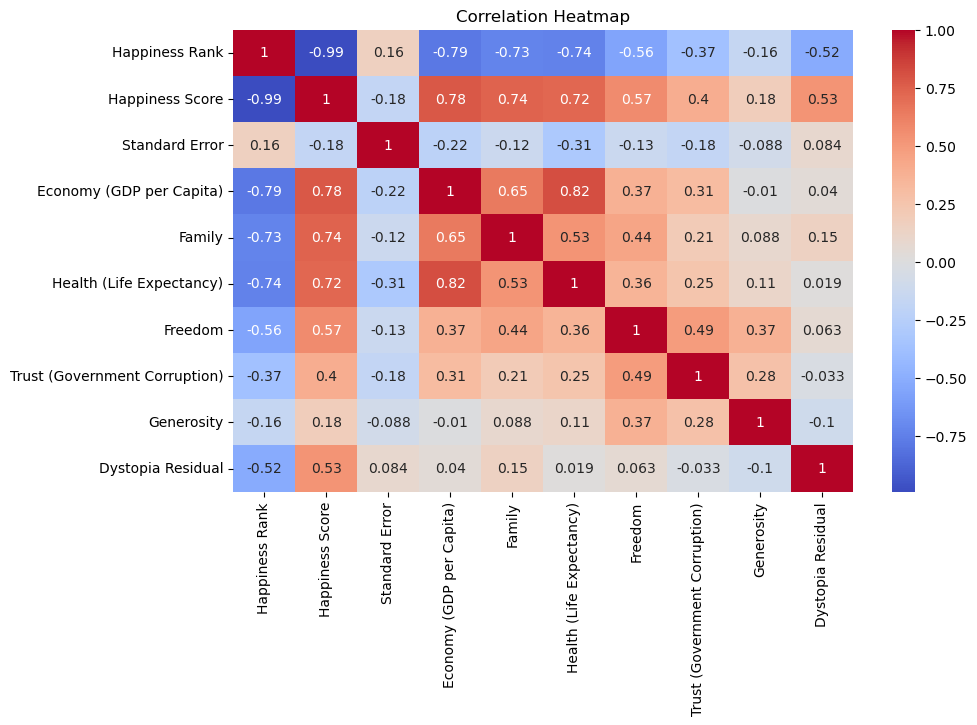

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

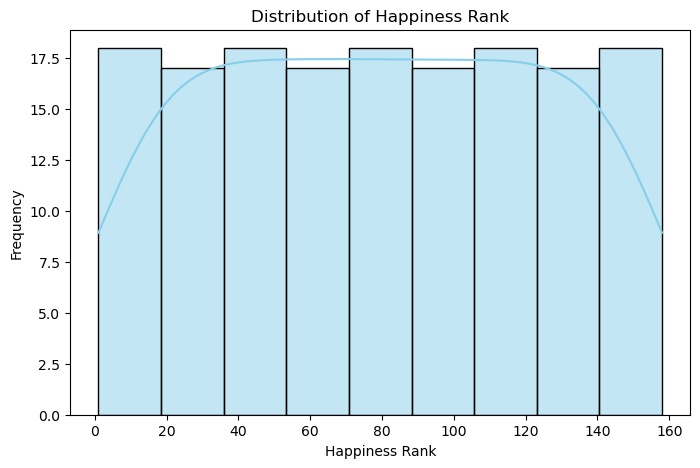

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df[num_cols[0]], kde=True, color='skyblue')
plt.title(f"Distribution of {num_cols[0]}")
plt.xlabel(num_cols[0])
plt.ylabel("Frequency")
plt.show()

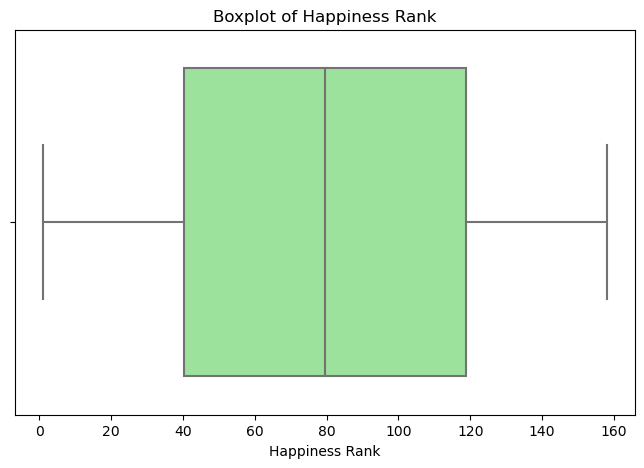

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[num_cols[0]], color='lightgreen')
plt.title(f"Boxplot of {num_cols[0]}")
plt.show()

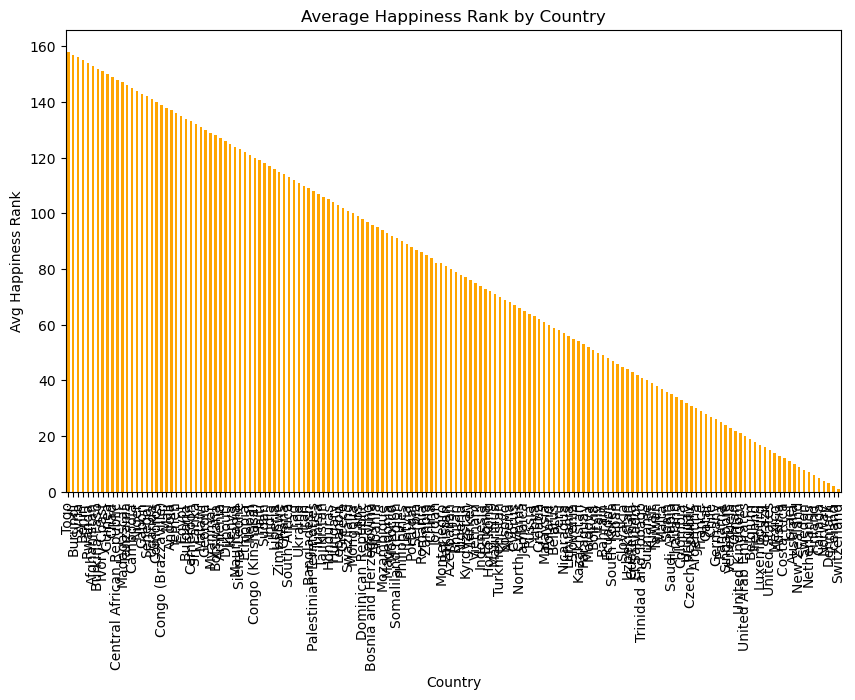

In [12]:
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    category_col = cat_cols[0]
    plt.figure(figsize=(10, 6))
    top_cats = df.groupby(category_col)[num_cols[0]].mean().sort_values(ascending=False)
    top_cats.plot(kind='bar', color='orange')
    plt.title(f"Average {num_cols[0]} by {category_col}")
    plt.ylabel(f"Avg {num_cols[0]}")
    plt.show()

In [13]:
if len(cat_cols) > 0:
    cat1, cat2 = top_cats.index[:2]
    group1 = df[df[category_col] == cat1][num_cols[0]]
    group2 = df[df[category_col] == cat2][num_cols[0]]

    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"\nT-Test between {cat1} and {cat2}:")
    print(f"T-Statistic = {t_stat:.4f}, P-Value = {p_val:.4e}")
    if p_val < 0.05:
        print("Result: Significant difference between groups ")
    else:
        print("Result: No significant difference ")



T-Test between Togo and Burundi:
T-Statistic = nan, P-Value = nan
Result: No significant difference 


C:\Users\dokur\shilish\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\dokur\shilish\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [14]:
df.to_csv("cleaned_amazon_sales.csv", index=False)
print("\nCleaned data saved as 'cleaned_amazon_sales.csv'")


Cleaned data saved as 'cleaned_amazon_sales.csv'
